In [39]:
import os
import sys
import json

data_files = os.listdir('.')
data_files = [f for f in data_files if f[:2] == '_g']

print(data_files)



['_greedy-nr.txt', '_greedy-lag-r.txt', '_greedy-lag-nr.txt', '_greedy-r.txt']


In [40]:
import numpy as np

results = {}
out = {}

dna_lengths = ['200', '400', '500', '600']

for fil in data_files:
    with open(fil, 'r') as f:
        res_values = {}
        tmp = f.readline()
        results[fil] = json.loads(tmp)
        for error_rate in results[fil]['files']:
            files = results[fil]['files'][error_rate]
            res_values[error_rate] = {}

            res_values[error_rate]['global_mean'] = np.mean(np.array([files[f]['quality-needleman'] for f in files]))

            #optimal solutions
            res_values[error_rate]['global_optimal'] = np.sum(np.array([1 for f in files if files[f]['quality-needleman'] == 1]))
            
            res_values[error_rate]['global_size'] = len([f for f in files])

            #for each length
            for l in dna_lengths:
                res_values[error_rate][l] = {}
                res_values[error_rate][l]['mean'] = np.mean(np.array([files[f]['quality-needleman'] for f in files if f[:3] == l]))
                res_values[error_rate][l]['optimal'] = np.sum(np.array([1 for f in files if files[f]['quality-needleman'] == 1 and f[:3] == l]))
                res_values[error_rate][l]['size'] = len([f for f in files if f[:3] == l])

        out[fil] = res_values

# json.dumps(out, indent=4, sort_keys=True)

In [41]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True

colMarkers = ['bo','md', 'gv', 'rD', 'ks' ]

def plot_results(x_series, y_series, legendNames = None, xLabel='', yLabel='', xTicks=None, limits=None):
    __plot = plt.figure()
    a1 = __plot.add_axes([0, 0, 1, 1])

    j = 0
    for x_s, y_s in zip(x_series, y_series):
        a1.plot(x_s, y_s, str(colMarkers[j][0] + '-'))
        j += 1

        #legend
    a1.legend(labels = legendNames, loc = 'lower right')
    a1.set_xlabel(xLabel, fontsize = 14)
    
    a1.set_ylabel(yLabel, fontsize = 14)
    #grid
    a1.grid(color = 'k', ls = ':')
    #limits
    if limits is None:
        y_min = min([min(ser) for ser in y_series])
        y_max = max([max(ser) for ser in y_series])
        x_min = min([min(ser) for ser in x_series])
        x_max = max([max(ser) for ser in x_series])
    else:
        y_min = limits[2]
        y_max = limits[3]
        x_min = limits[0]
        x_max = limits[1]
    a1.set_ylim(y_min, y_max)
    a1.set_xlim(x_min, x_max)
    if xTicks is not None:
        a1.set_xticks(xTicks)
    #ticks
    
    a1.tick_params(direction = 'in')

    return __plot

# tmp = plot_results([[1,2,3], [1,2,3]], [[1,2,3], [3,2,3]], xTicks=[1,2,3], legendNames=['s', 't'])
# plt.show()

_greedy-nr.txt
_greedy-lag-r.txt
_greedy-lag-nr.txt
_greedy-r.txt


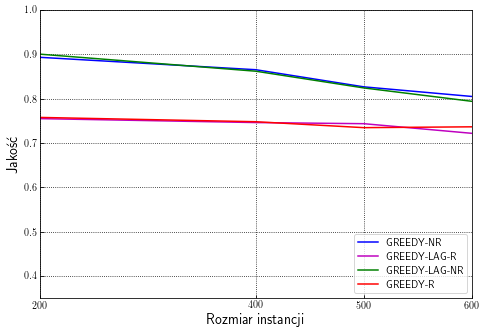

In [42]:
x_ser = []
y_ser = []

x_tic = [int(v) for v in dna_lengths]
lims = [200, 600, 0.35, 1]

legend_names = []

for res in out:
    print(res)
    legend_names.append(res[1:-4].upper())
    tmp = [0] * len(dna_lengths)
    for err in out[res]:
        for i in range(len(dna_lengths)):
            tmp[i] += out[res][err][dna_lengths[i]]['mean']
    for i in range(len(tmp)):
        tmp[i] /= 3
    y_ser.append(tmp)

x_ser.append([int(v) for v in dna_lengths])
x_ser = x_ser * len(y_ser)

y_ser

tmp = plot_results(
    x_series=x_ser,
    y_series=y_ser,
    legendNames=legend_names,
    xLabel=r'Rozmiar instancji',
    yLabel=r'Jakość',
    xTicks=x_tic,
    limits=lims
)

plt.show()

In [44]:
import json

with open('_aco_tuning_results_v2.txt', 'r') as f:
    aco_tun_results = f.read()

    aco_tun_results = json.loads(aco_tun_results)

    results = [(i, aco_tun_results[i]['quality']) for i in aco_tun_results]

    results = sorted(results, key=lambda it: it[1])

    for i in range(min(10, len(results))):
        print(results[-1 - i][0], results[-1 - i][1], aco_tun_results[
            results[-1 - i][0]
        ])
    print('================================')
    for i in range(min(10, len(results))):
        print(results[i][0], results[i][1], aco_tun_results[results[i][0]])


4 0.8230329882993921 {'nf': 4, 'nb': 0, 'rcl_card': 5, 'rho': 0.01, 'kib': 0.3, 'krb': 0.3, 'kbs': 0.3, 'max duration': 5, 'conv threshold': 0.9999, 'determinism rate': 0.95, 'init det. rate': 1, 'quality': 0.8230329882993921}
8 0.8175428222896265 {'nf': 8, 'nb': 0, 'rcl_card': 7, 'rho': 0.01, 'kib': 0.3, 'krb': 0.3, 'kbs': 0.3, 'max duration': 5, 'conv threshold': 0.9999, 'determinism rate': 0.95, 'init det. rate': 1, 'quality': 0.8175428222896265}
2 0.8142097472767759 {'nf': 8, 'nb': 0, 'rcl_card': 3, 'rho': 0.01, 'kib': 0.3, 'krb': 0.3, 'kbs': 0.3, 'max duration': 5, 'conv threshold': 0.9999, 'determinism rate': 0.95, 'init det. rate': 1, 'quality': 0.8142097472767759}
6 0.8111364145640174 {'nf': 2, 'nb': 0, 'rcl_card': 7, 'rho': 0.01, 'kib': 0.3, 'krb': 0.3, 'kbs': 0.3, 'max duration': 5, 'conv threshold': 0.9999, 'determinism rate': 0.95, 'init det. rate': 1, 'quality': 0.8111364145640174}
5 0.807703620081418 {'nf': 8, 'nb': 0, 'rcl_card': 5, 'rho': 0.01, 'kib': 0.3, 'krb': 0.3, '

[[0.74835387 0.75761191 0.80185386 0.7844512 ]
 [0.71721462 0.71699795 0.75417888 0.74589392]
 [0.67575349 0.69410809 0.71230131 0.75365349]
 [0.66391108 0.68028696 0.70068502 0.73180987]]


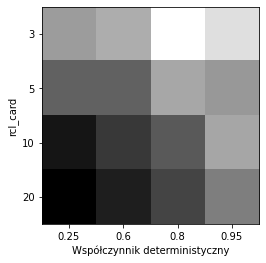

In [28]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy.random as nr
import numpy as np
import json

with open('_det_corr.txt', 'r') as f:
    res = f.read()
    res = json.loads(res)

    x_label = 'det. rate list'
    y_label = 'rcl card'

    x_item = 'determinism rate'
    y_item = 'rcl_card'

    x_axis = res[x_label]
    y_axis = res[y_label]

    quality_name = 'quality'

    quilt = np.zeros((len(y_axis), len(x_axis)))
    for it in res["iterations"]:
        try:
            i = int(it)
        
            quilt[
                y_axis.index(res["iterations"][it][y_item])
            ][
                x_axis.index(res["iterations"][it][x_item])
            ] = res["iterations"][it][quality_name]
        except ValueError:
            continue

    print(quilt)
    fig, ax = plt.subplots(1,1)
    
    img = ax.imshow(quilt, interpolation='none', aspect='equal', cmap='gray')
    ax.set_xticks([i for i in range(np.shape(quilt)[1])])
    ax.set_xticklabels(x_axis)
    
    ax.set_yticks([i for i in range(np.shape(quilt)[0])])
    ax.set_yticklabels(y_axis)
    ax.set_ylabel(r'rcl_card')
    ax.set_xlabel(r'Współczynnik deterministyczny')
    plt.show()

[[0.81543897 0.81135733 0.81512574 0.80739733]
 [0.82049124 0.80882048 0.808684   0.80276706]
 [0.83992773 0.83385643 0.82462993 0.79635849]
 [0.82819089 0.81070025 0.81007971 0.78468309]]


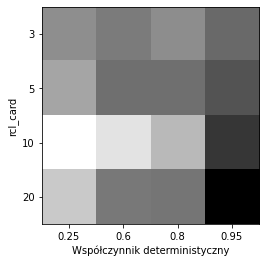

In [32]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy.random as nr
import numpy as np
import json

with open('_init_det_corr.txt', 'r') as f:
    res = f.read()
    res = json.loads(res)

    x_label = 'init det. rate list'
    y_label = 'init rcl card'

    x_item = 'init det. rate'
    y_item = 'init det. card'

    x_axis = res[x_label]
    y_axis = res[y_label]

    quality_name = 'quality'

    quilt = np.zeros((len(y_axis), len(x_axis)))
    for it in res["iterations"]:
        try:
            i = int(it)
        
            quilt[
                y_axis.index(res["iterations"][it][y_item])
            ][
                x_axis.index(res["iterations"][it][x_item])
            ] = res["iterations"][it][quality_name]
        except ValueError:
            continue

    print(quilt)
    fig, ax = plt.subplots(1,1)
    
    img = ax.imshow(quilt, interpolation='none', aspect='equal', cmap='gray')
    ax.set_xticks([i for i in range(np.shape(quilt)[1])])
    ax.set_xticklabels(x_axis)
    
    ax.set_yticks([i for i in range(np.shape(quilt)[0])])
    ax.set_yticklabels(y_axis)
    ax.set_ylabel(r'rcl_card')
    ax.set_xlabel(r'Współczynnik deterministyczny')
    plt.show()